In [454]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [455]:
data_df = pd.read_csv("./data/lab2_1_data.csv", header=None)


In [456]:
data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.74589,0.43352,0.34667,0.43563,0.87224,0.91057,0.53584,0.34912,0.54057,0.46997,...,-0.10911,-0.28669,-0.78850,-0.92342,-0.72261,-0.68034,-0.95553,-0.21214,-0.503930,-0.92196
1,-0.43265,-0.53858,-0.35825,-0.95307,-0.59757,-0.73190,-0.75979,-0.31302,-0.56459,-0.97972,...,0.65793,0.87399,0.78979,0.59957,0.85781,0.52850,1.09170,0.48182,0.026142,0.52301


In [457]:
data = data_df.transpose().to_numpy()

In [458]:
data

array([[ 0.74589  , -0.43265  ],
       [ 0.43352  , -0.53858  ],
       [ 0.34667  , -0.35825  ],
       [ 0.43563  , -0.95307  ],
       [ 0.87224  , -0.59757  ],
       [ 0.91057  , -0.7319   ],
       [ 0.53584  , -0.75979  ],
       [ 0.34912  , -0.31302  ],
       [ 0.54057  , -0.56459  ],
       [ 0.46997  , -0.97972  ],
       [ 0.70024  , -0.38539  ],
       [ 0.77378  , -0.29958  ],
       [ 0.82682  , -0.64523  ],
       [ 0.14546  , -0.23598  ],
       [ 0.68834  ,  0.28251  ],
       [ 0.35971  , -0.10906  ],
       [ 0.81554  , -0.74388  ],
       [ 0.48447  , -0.79279  ],
       [ 0.29453  , -0.70226  ],
       [ 0.64096  , -0.2039   ],
       [ 0.45428  , -0.53894  ],
       [ 0.63494  , -0.40594  ],
       [ 0.37933  , -0.12101  ],
       [ 0.23349  , -0.51425  ],
       [ 0.90886  , -0.57161  ],
       [ 0.43876  , -0.16906  ],
       [ 0.33963  , -0.66784  ],
       [ 0.41841  , -0.61187  ],
       [ 0.42219  , -0.42756  ],
       [ 0.25524  , -0.59752  ],
       [ 0

In [459]:
RANDOM_STATE = 42
rand_gen = np.random.default_rng(RANDOM_STATE)


max_epochs = 10000
epoch = 0
norm_distance = np.inf
threshold = 1e-8
eta = 0.00001
w = rand_gen.uniform(-1, 1, 2) # input is 2-dimension

In [460]:
w

array([ 0.5479121 , -0.12224312])

In [461]:
while (epoch < max_epochs) and (norm_distance > threshold):
    np.random.shuffle(data) # shuffle data at each epoch
    w_old = w.copy() # copy the old wiehts to compare with the new using the norm2

    for u in data:
        v = np.inner(w, u) # compute output v
        delta_w = (eta * v * u) # compute the delta W
        w = w + delta_w # update the weights
    
    norm_distance = np.linalg.norm(w_old - w)
    epoch += 1
    

In [462]:
epoch

10000

In [463]:
norm_distance

0.09437663152537039

In [464]:
w

array([ 115.40815454, -113.55061505])

In [465]:
Q = np.corrcoef(np.transpose(data))

In [466]:
eigval, eigvec = np.linalg.eig(Q)

In [467]:
eigval

array([1.79945262, 0.20054738])

In [468]:
i_max_eigval = np.argmax(eigval)

i_max_eigval

0

In [469]:
eigvec[:, 0][0]

0.7071067811865475

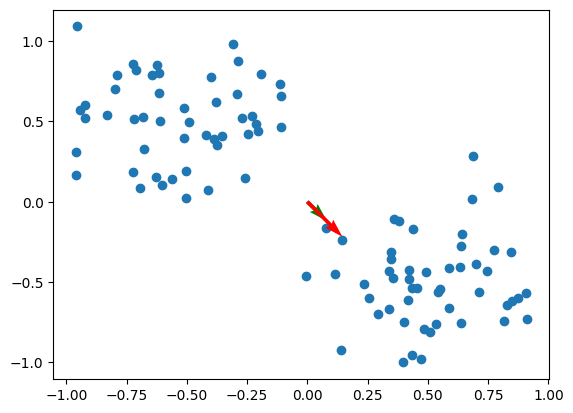

In [470]:
plt.scatter(data[:, 0], data[:, 1])
origin = np.array([0,0])
plt.quiver(*origin, w[0], w[1], color='g')
plt.quiver(*origin, eigvec[:, i_max_eigval][0], eigvec[:, i_max_eigval][1],  color='r', scale=10)
plt.show()